In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path
path = r'C:\Users\13472\Documents\05-2023 Instacart Basket Analysis- UE'

In [3]:
# Importing orders_products_all.pkl

df = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
df.shape

(32404859, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       int64  
 1   user_id                        object 
 2   order_number                   int64  
 3   orders_day_of_week             int64  
 4   orders_hod                     int64  
 5   days_since_prior_order         float64
 6   product_id                     int64  
 7   add_to_cart_order              int64  
 8   reordered                      int64  
 9   product_name                   object 
 10  aisle_id                       int64  
 11  department_id                  int64  
 12  prices                         float64
 13  price_range_loc                object 
 14  busiest_day                    object 
 15  busiest_days                   object 
 16  busiest_period_of_day          object 
 17  max_order                      int64  
 18  

In [6]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hod,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# Step 2

Customer names was removed in Task 4.9

# Step 3

In [7]:
# Creating an empty list for region
region = []

In [8]:
# Checking to see how the states are written 

df['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [9]:
# Filling 'region' with 'northeast', 'midwest', 'south', or 'west'

for x in df['state']:
    if x in ['Maine','New Hampshire', 'Vermont', 'Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('northeast')
    elif x in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('midwest')
    elif x in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('south')
    else:
        region.append('west')
            

In [10]:
region

['south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 'midwest',
 '

In [11]:
# Adding 'region' column to df

df['region'] = region

In [12]:
# Getting frequency distribution for 'region'

df['region'].value_counts(dropna = False)

south        10791885
west          8292913
midwest       7597325
northeast     5722736
Name: region, dtype: int64

In [13]:
# Comparing region with spending tab
region_spending_cross = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [14]:
region_spending_cross

spending_flag,High spender,Low spender
region,,
midwest,155975,7441350
northeast,108225,5614511
south,209691,10582194
west,160354,8132559


In [15]:
# Copying to clipboard to paste in Excel

region_spending_cross.to_clipboard()

# Step 4

In [16]:
# Create an exclusion flag for low-activity customers
df.loc[df['max_order'] < 5, 'low_order_flag'] = 'Low order customer'

In [17]:
df.loc[df['max_order'] >= 5, 'low_order_flag'] = 'High order customer'

In [18]:
df['low_order_flag'].value_counts(dropna = False)

High order customer    30964564
Low order customer      1440295
Name: low_order_flag, dtype: int64

In [19]:
# Creating a Sample
df_high = df[df['low_order_flag'] == 'High order customer']

In [20]:
df_high.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hod,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region,low_order_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,south,High order customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,south,High order customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,south,High order customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,south,High order customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,south,High order customer


In [21]:
# Exporting the sample as orders_products_high.pkl

df_high.to_pickle(os.path.join(path,'02. Data','Prepared Data','orders_products_high.pkl'))

# Step 5

# Age

In [22]:
# Creating the age_flag

age_flag = []
for x in df['age'].tolist():
    if x <= 25:
        age_flag.append('Young')
    elif x > 25 and x < 65:
        age_flag.append('Middle-aged')
    elif x >= 65:
        age_flag.append('Senior')
    else:
        print('Weird value:', x)

In [23]:
# Adding age_flag to df as 'age_profile'

df['age_profile'] = age_flag

In [24]:
# Getting frequency distribution for 'age_profile'

df['age_profile'].value_counts(dropna = False)

Middle-aged    19784586
Senior          8575084
Young           4045189
Name: age_profile, dtype: int64

# Income

In [25]:
# Creating the income_flag

income_flag = []
for x in df['income'].tolist():
    if x < 75000:
        income_flag.append('Low-income')
    elif x >= 75000 and x < 150000:
        income_flag.append('Mid-income')
    elif x >= 150000:
        income_flag.append('High-income')
    else:
        print('Weird value:', row)

In [26]:
# Adding income_flag to df as 'income_profile'

df['income_profile'] = income_flag

In [27]:
# Getting frequency distribution for 'income_profile'

df['income_profile'].value_counts(dropna = False)

Mid-income     17910512
Low-income     10442766
High-income     4051581
Name: income_profile, dtype: int64

# Department

In [28]:
# Creating a crosstab between 'department_id' and 'user_id'

dep_user_cross = pd.crosstab(df['department_id'], df['user_id'], dropna = False)

In [29]:
dep_user_cross

user_id,1,10,100,1000,10000,100000,100001,100002,100003,100004,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
department_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,3,5,56,0,16,7,3,0,...,13,16,4,9,12,7,51,4,2,9
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,2,1,56,8,17,1,2,0,...,1,0,2,4,7,2,4,3,0,7
4,5,72,10,34,340,51,393,0,10,0,...,196,78,4,22,68,10,20,10,14,129
5,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
6,0,1,0,0,2,1,24,0,0,0,...,0,1,2,0,0,0,1,2,0,1
7,13,0,0,19,36,1,55,2,3,14,...,0,3,10,25,13,3,6,2,0,7
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,38,1,9,0,1,4,...,2,4,8,0,1,2,0,2,0,37


In [30]:
# Assigning nutrition flags 
vegan_dict = dict()
for user in dep_user_cross:
    workinglist = dep_user_cross[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:   # the index starts at 0, so index 0 corresponds to dep_id=1
        vegan_dict[user] = 'Vegan'
    else:
        vegan_dict[user] = 'Non-vegan'

In [31]:
# Assigning user flags to the vegan_flag

vegan_flag = []
for user in df['user_id']:
    vegan_flag.append(vegan_dict[user])

In [32]:
# Adding vegan_flag to df as 'vegan_profile'

df['vegan_profile'] = vegan_flag

In [33]:
# Getting frequency distribution for 'vegan_profile'

df['vegan_profile'].value_counts(dropna = False)

Non-vegan    32021432
Vegan          383427
Name: vegan_profile, dtype: int64

# Dependants

In [34]:
df['family_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: family_status, dtype: int64

In [35]:
# Creating the 'family_profile' column and labeling the 'married no children' customers

df.loc[(df['family_status'] == 'married') & (df['number_of_dependants'] == 1), 'family_profile'] = 'Married no children'

In [36]:
# Creating the 'family_profile' column and labeling the 'married with children' customers

df.loc[(df['family_status'] == 'married') & (df['number_of_dependants'] >= 2), 'family_profile'] = 'Married with children'

In [37]:
# Creating the 'family_profile' column and labeling the 'single no children' customers

df.loc[(df['family_status'] != 'married') & (df['number_of_dependants'] == 0), 'family_profile'] = 'Single no children'

In [38]:
# Creating the 'family_profile' column and labeling the 'single with children' customers

df.loc[(df['family_status'] != 'married') & (df['number_of_dependants'] >= 1), 'family_profile'] = 'Single with children'

In [39]:
# Getting frequency distribution for 'family_profile'

df['family_profile'].value_counts(dropna = False)

Married with children    15205849
Single no children        8097503
Married no children       7550904
Single with children      1550603
Name: family_profile, dtype: int64

# Visualizations

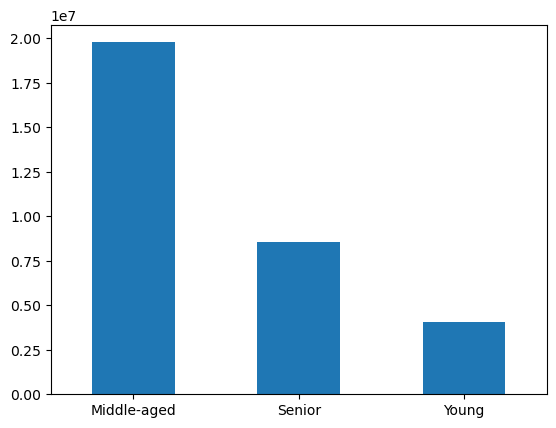

In [40]:
# age_profile

age_profile_bar = df['age_profile'].value_counts().plot.bar(rot=0)

In [41]:
# Exporting the viz

age_profile_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'age_profile_bar.png'))

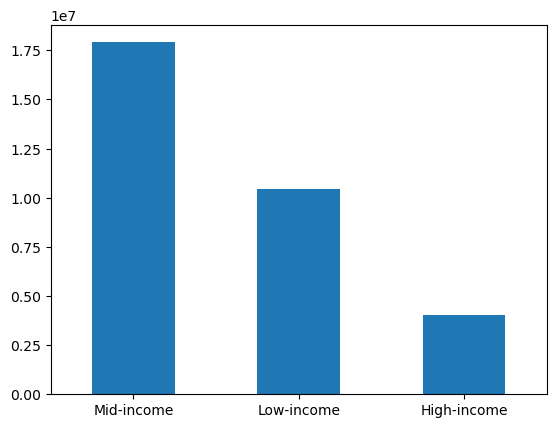

In [42]:
# income_profile

income_profile_bar = df['income_profile'].value_counts().plot.bar(rot=0)

In [44]:
# Exporting the viz

income_profile_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'income_profile_bar.png'))

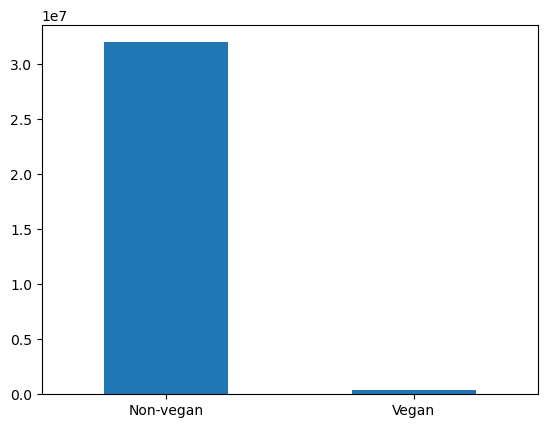

In [45]:
# vegan_profile

vegan_profile_bar = df['vegan_profile'].value_counts().plot.bar(rot=0)

In [47]:
# Exporting the viz

vegan_profile_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'vegan_profile_bar.png'))

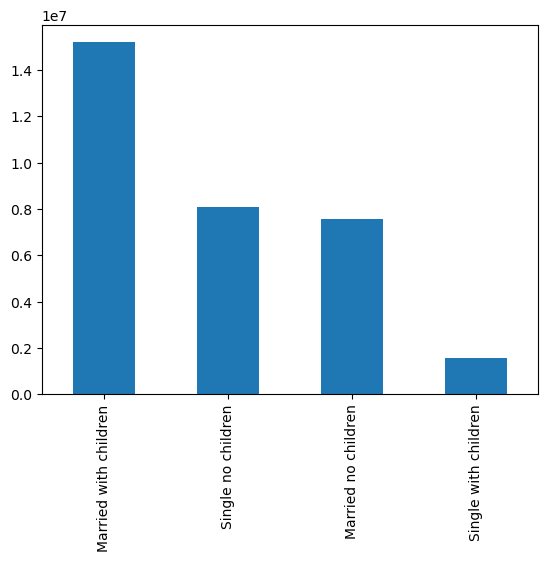

In [48]:
# family_profile

family_profile_bar = df['family_profile'].value_counts().plot.bar()

In [49]:
# Exporting the viz

family_profile_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'family_profile_bar.png'))

# Step 7

In [50]:
# Aggregate Age
df.groupby('age_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                              mean   max  min      mean   max  min
age_profile                                                       
Middle-aged              11.117362  30.0  0.0  7.789660  25.0  1.0
Senior                   11.078641  30.0  0.0  7.796546  25.0  1.0
Young                    11.093030  30.0  0.0  7.785748  25.0  1.0

In [51]:
# Aggregate Income
df.groupby('income_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                 mean   max  min      mean   max  min
income_profile                                                       
High-income                 10.941393  30.0  0.0  7.946928  25.0  1.0
Low-income                  11.240514  30.0  0.0  7.434729  25.0  1.0
Mid-income                  11.061703  30.0  0.0  7.963487  25.0  1.0

In [52]:
# Aggregate food preference (vegan or Non vegan)
df.groupby('vegan_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                mean   max  min      mean   max  min
vegan_profile                                                       
Non-vegan                  11.063329  30.0  0.0  7.800348  25.0  1.0
Vegan                      14.749275  30.0  0.0  7.009920  20.0  1.0

In [53]:
# Aggregate Dependants
df.groupby('family_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                        mean   max  min      mean   max  min
family_profile                                                              
Married no children                11.113141  30.0  0.0  7.795712  25.0  1.0
Married with children              11.117681  30.0  0.0  7.788203  25.0  1.0
Single no children                 11.080805  30.0  0.0  7.789975  25.0  1.0
Single with children               11.048170  30.0  0.0  7.800712  25.0  1.0

# Step 8

# Profiles by Region

In [54]:
# creating a crosstab between region and age
age_region_cross = pd.crosstab(df['age_profile'], df['region'], normalize = 'columns')

In [55]:
age_region_cross

region,midwest,northeast,south,west
age_profile,,,,
Middle-aged,0.614288,0.604208,0.609621,0.612686
Senior,0.262045,0.271531,0.262814,0.264573
Young,0.123666,0.124261,0.127565,0.122741


In [56]:
# creating a crosstab between region and income
income_region_cross = pd.crosstab(df['income_profile'], df['region'], normalize = 'columns')

In [57]:
income_region_cross

region,midwest,northeast,south,west
income_profile,,,,
High-income,0.125827,0.123505,0.124372,0.126208
Low-income,0.319571,0.318405,0.323667,0.325550
Mid-income,0.554602,0.558090,0.551961,0.548242


In [58]:
# creating a crosstab between region and food preference
vegan_region_cross = pd.crosstab(df['vegan_profile'], df['region'], normalize = 'columns')

In [59]:
vegan_region_cross

region,midwest,northeast,south,west
vegan_profile,,,,
Non-vegan,0.988115,0.988159,0.988389,0.987934
Vegan,0.011885,0.011841,0.011611,0.012066


In [60]:
# creating a crosstab between region and dependants
family_region_cross = pd.crosstab(df['family_profile'], df['region'], normalize = 'columns')

In [61]:
family_region_cross

region,midwest,northeast,south,west
family_profile,,,,
Married no children,0.236932,0.236116,0.229883,0.231373
Married with children,0.464053,0.469197,0.470703,0.472141
Single no children,0.250772,0.247836,0.250342,0.249893
Single with children,0.048243,0.046851,0.049072,0.046593


# Profiles by Department

In [62]:
# creating a crosstab between department and age
age_department_cross = pd.crosstab(df['age_profile'], df['department_id'], normalize = 'index')   

In [63]:
pd.set_option('display.max_columns', None)    # displays all columns

age_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
age_profile,,,,,,,,,,,,,,,,,,,,,
Middle-aged,0.068796,0.001122,0.036214,0.292547,0.004764,0.008312,0.082903,0.002938,0.026682,0.001057,0.013867,0.021732,0.057853,0.021718,0.032962,0.166679,0.022748,0.013210,0.089266,0.032507,0.002125
Senior,0.069232,0.001099,0.036096,0.293147,0.004552,0.008253,0.083362,0.003065,0.026698,0.001078,0.013691,0.022171,0.057956,0.021439,0.032937,0.166321,0.022966,0.012763,0.088689,0.032375,0.002110
Young,0.069212,0.001154,0.036198,0.291112,0.005046,0.008414,0.082342,0.003287,0.027146,0.001093,0.013798,0.021965,0.057796,0.022129,0.033000,0.166830,0.022662,0.013105,0.089228,0.032261,0.002225


In [64]:
# creating a crosstab between department and income
income_department_cross = pd.crosstab(df['income_profile'], df['department_id'], normalize = 'index')

In [65]:
income_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
income_profile,,,,,,,,,,,,,,,,,,,,,
High-income,0.071178,0.001172,0.038023,0.291115,0.006159,0.008462,0.080252,0.003335,0.027462,0.000931,0.013835,0.023628,0.059801,0.021438,0.034248,0.168907,0.023887,0.013435,0.078240,0.032334,0.002157
Low-income,0.067229,0.001114,0.034505,0.279570,0.004614,0.007760,0.091741,0.002845,0.024468,0.001184,0.013988,0.017992,0.055207,0.023537,0.030146,0.160883,0.023559,0.011447,0.113855,0.032205,0.002150
Mid-income,0.069473,0.001111,0.036741,0.300400,0.004498,0.008595,0.078442,0.003043,0.027908,0.001029,0.013704,0.023747,0.058992,0.020680,0.034309,0.169417,0.022102,0.013949,0.077139,0.032603,0.002119


In [66]:
# creating a crosstab between department and food preference
vegan_department_cross = pd.crosstab(df['vegan_profile'], df['department_id'], normalize = 'index')

In [67]:
vegan_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
vegan_profile,,,,,,,,,,,,,,,,,,,,,
Non-vegan,0.069073,0.001104,0.036399,0.292392,0.004387,0.008358,0.081628,0.003010,0.026952,0.001059,0.013644,0.022139,0.058016,0.021700,0.033148,0.168598,0.022303,0.013163,0.088189,0.032604,0.002135
Vegan,0.059795,0.002470,0.017964,0.303800,0.034432,0.004222,0.193680,0.003484,0.009386,0.001750,0.027872,0.000000,0.045936,0.021263,0.017244,0.000000,0.063884,0.006045,0.165925,0.018809,0.002037


In [68]:
# creating a crosstab between department and dependants
family_department_cross = pd.crosstab(df['family_profile'], df['department_id'], normalize = 'index')

In [69]:
family_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
family_profile,,,,,,,,,,,,,,,,,,,,,
Married no children,0.068501,0.001134,0.036290,0.292094,0.004674,0.008405,0.082844,0.002980,0.026714,0.001107,0.013833,0.022041,0.058145,0.021909,0.033025,0.167336,0.022995,0.012703,0.089014,0.032144,0.002111
Married with children,0.069171,0.001094,0.036029,0.292561,0.004629,0.008221,0.083094,0.002960,0.026828,0.001070,0.013798,0.021994,0.057826,0.021590,0.033057,0.166058,0.022954,0.013235,0.089272,0.032420,0.002140
Single no children,0.068806,0.001133,0.036358,0.293355,0.004831,0.008362,0.083290,0.003036,0.026584,0.001022,0.013832,0.021498,0.057642,0.021559,0.032706,0.166639,0.022325,0.013151,0.089015,0.032744,0.002110
Single with children,0.069994,0.001232,0.036207,0.289970,0.005737,0.008432,0.080375,0.003624,0.026894,0.001080,0.013744,0.021915,0.058217,0.022398,0.033013,0.168184,0.022718,0.012992,0.088458,0.032513,0.002303


# Step 9

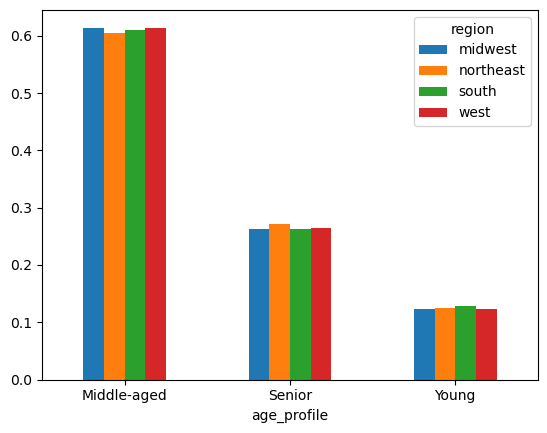

In [70]:
# Age Region
age_region_bar = age_region_cross.plot.bar(rot=0)

In [72]:
# Exporting 

age_region_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'age_region_bar.png'))

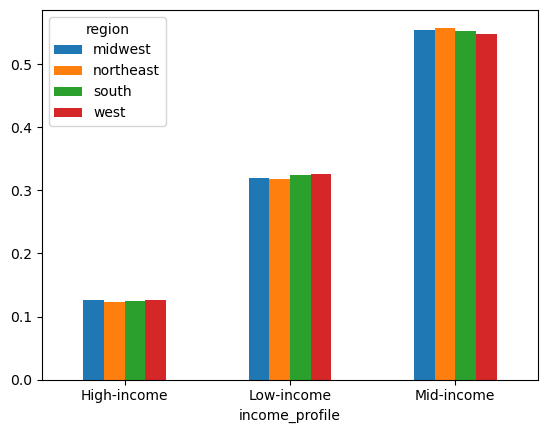

In [73]:
# Income Region
income_region_bar = income_region_cross.plot.bar(rot=0)

In [74]:
# Exporting 

income_region_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'income_region_bar.png'))

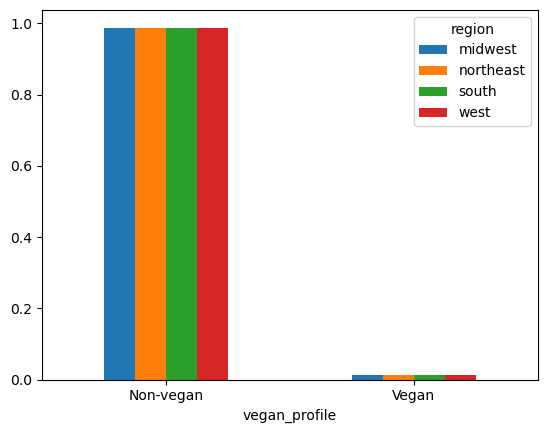

In [75]:
# Food Preference Region
vegan_region_bar = vegan_region_cross.plot.bar(rot=0)

In [76]:
# Exporting 

vegan_region_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'vegan_region_bar.png'))

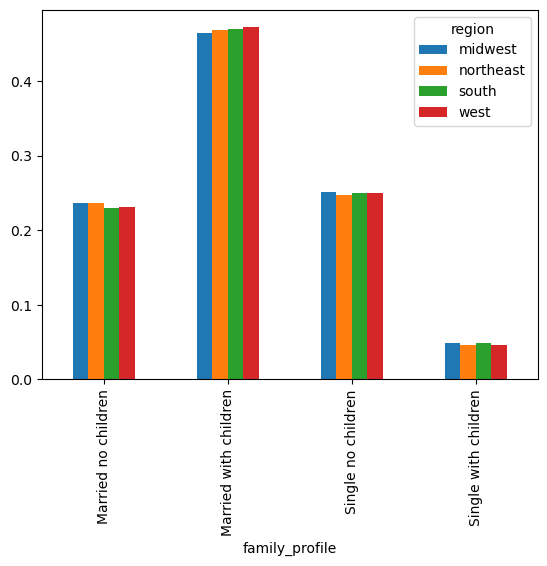

In [77]:
# Dependants Region
family_region_bar = family_region_cross.plot.bar()

In [78]:
# Exporting 

family_region_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'family_region_bar.png'))

# Age

In [79]:
# Age Department
age_department_cross = pd.crosstab(df['department_id'], df['age_profile'])

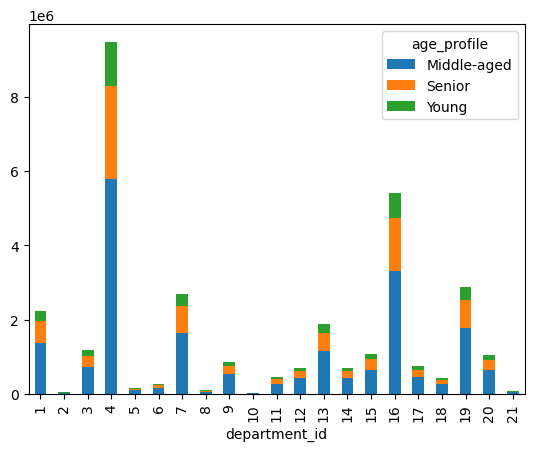

In [81]:
age_department_bar = age_department_cross.plot.bar(stacked = True)

In [82]:
# Exporting 

age_department_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'age_department_bar.png'))

# Income

In [83]:
income_department_cross = pd.crosstab(df['department_id'], df['income_profile'])

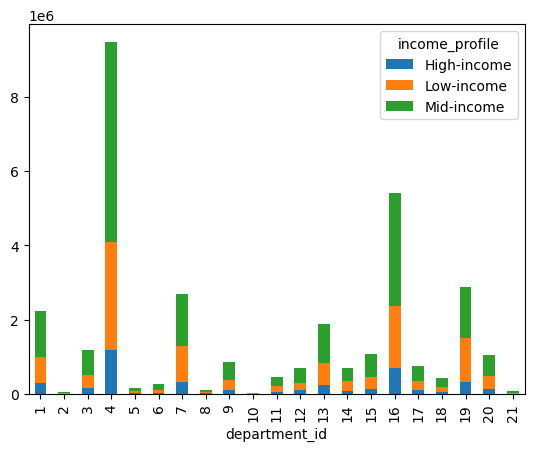

In [86]:
income_department_bar = income_department_cross.plot.bar(stacked = True)

In [87]:
# Exporting 

income_department_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'income_department_bar.png'))

# Food Preference

In [88]:
vegan_department_cross = pd.crosstab(df['department_id'], df['vegan_profile'])

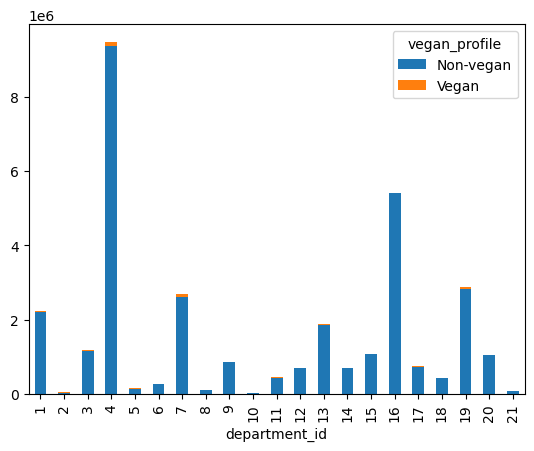

In [89]:
vegan_department_bar = vegan_department_cross.plot.bar(stacked = True)

In [91]:
# Exporting
vegan_department_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'vegan_department_bar.png'))

# Dependants

In [92]:
family_department_cross = pd.crosstab(df['department_id'], df['family_profile'])

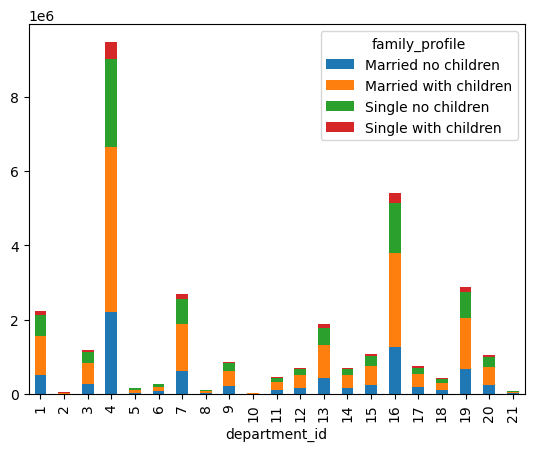

In [93]:
family_department_bar = family_department_cross.plot.bar(stacked = True)

In [94]:
# Exporting 

family_department_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'family_department_bar.png'))

# Extra Questions

# Are there difference in ordering habits based on a customer’s loyalty status?

In [95]:
# Based on Order Frequency
frequency_loyalty_crossed = pd.crosstab(df['order_frequency_flag'], df['loyalty_flag'])

frequency_loyalty_crossed

loyalty_flag,Loyal customer,New customer,Regular customer
order_frequency_flag,,,
Frequent customer,10279960,1648671,9631222
Non-frequent customer,0,2724962,911475
Regular customer,4133,1870352,5334079


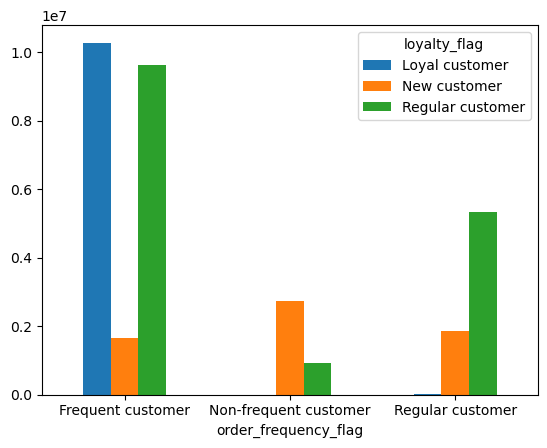

In [96]:
frequency_loyalty = frequency_loyalty_crossed.plot.bar(rot=0)

In [98]:
# Exporting 

frequency_loyalty.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'frequency_loyalty_bar.png'))

In [99]:
# By Spending 
spending_loyalty_crossed = pd.crosstab(df['spending_flag'], df['loyalty_flag'])

spending_loyalty_crossed

loyalty_flag,Loyal customer,New customer,Regular customer
spending_flag,,,
High spender,216600,114831,302814
Low spender,10067493,6129159,15573962


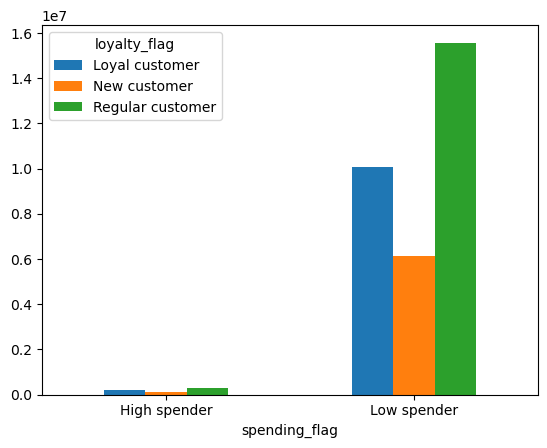

In [100]:
spending_loyalty_bar = spending_loyalty_crossed.plot.bar(rot=0)

In [102]:
# Exporting 
spending_loyalty_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'spending_loyalty_bar.png'))

# "Are there differences in ordering habits based on a customer's region?"

In [103]:
# Based on order frequency 
frequency_region_crossed = pd.crosstab(df['order_frequency_flag'], df['region'])

frequency_region_crossed

region,midwest,northeast,south,west
order_frequency_flag,,,,
Frequent customer,5017709,3804566,7192372,5545206
Non-frequent customer,863419,630182,1215088,927748
Regular customer,1716197,1287988,2384420,1819959


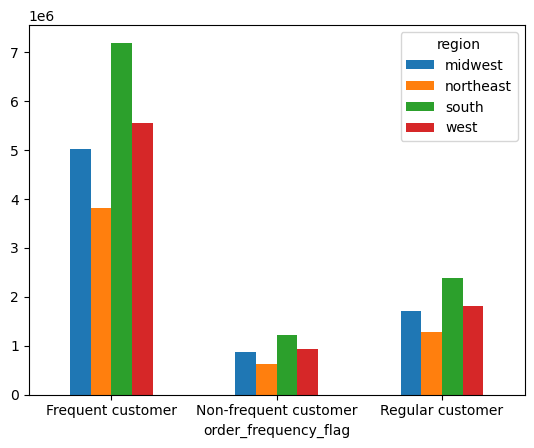

In [104]:
frequency_region = frequency_region_crossed.plot.bar(rot=0)

In [107]:
# Exporting
frequency_region.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'frequency_region_bar.png'))

In [108]:
# By Spending

spending_region_crossed = pd.crosstab(df['spending_flag'], df['region'])

spending_region_crossed

region,midwest,northeast,south,west
spending_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


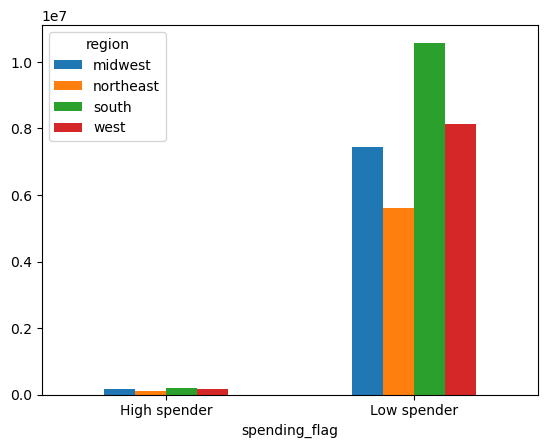

In [109]:
spending_region_bar = spending_region_crossed.plot.bar(rot=0)

In [111]:
# Exporting 

spending_region_bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'spending_region_bar.png'))

# Step 10

In [112]:
# Exporting final data 

df.to_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'orders_products_final.pkl'))

In [114]:
 df.info()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 36 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       int64  
 1   user_id                        object 
 2   order_number                   int64  
 3   orders_day_of_week             int64  
 4   orders_hod                     int64  
 5   days_since_prior_order         float64
 6   product_id                     int64  
 7   add_to_cart_order              int64  
 8   reordered                      int64  
 9   product_name                   object 
 10  aisle_id                       int64  
 11  department_id                  int64  
 12  prices                         float64
 13  price_range_loc                object 
 14  busiest_day                    object 
 15  busiest_days                   object 
 16  busiest_period_of_day          object 
 17  max_order                      int64  
 18  